# 📊 Analyse Exploratoire des Données (EDA)
Bienvenue dans cette analyse exploratoire des données. Nous allons explorer, nettoyer et visualiser les données pour mieux comprendre les tendances et les relations entre les variables.
---

## 🔍 1. Importation et Exploration des Données
Dans cette section, nous chargeons les données et examinons leur structure pour détecter d'éventuelles anomalies.

## 🧹 2. Nettoyage et Préparation des Données
Nous allons identifier et traiter les valeurs manquantes, les doublons et ajuster les types de données si nécessaire.

## 📊 3. Visualisation des Données
Nous allons créer des graphiques pour mieux comprendre la distribution des variables et détecter d'éventuelles anomalies.

## 🔗 4. Analyse des Corrélations
Nous analysons les relations entre les différentes variables grâce à une matrice de corrélation et d'autres techniques statistiques.

## 🏁 5. Conclusion et Préparation pour la Modélisation
Nous résumons les principales observations et préparons les données pour les étapes suivantes de la modélisation.

# 📊 Début de l'EDA

## 📥 1. Importation des bibliothèques nécessaires

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 2. Chargement des données

In [9]:
df = pd.read_csv("datas/train.csv")

## 🧹 3. Prétraitement des données

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [12]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [13]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [14]:
df.drop(df[df["Mileage"].isna()].index, inplace=True)
df = df.drop(["New_Price"], axis=1)

In [ ]:
# Fonction pour extraire les valeurs numériques
def extract_numeric(value):
    if isinstance(value, str):
        value = ''.join([c for c in value if c.isdigit() or c == '.'])
        return float(value) if value else None
    return value

In [16]:
# Appliquer la conversion
df["Mileage"] = df["Mileage"].apply(extract_numeric)
df["Engine"] = df["Engine"].apply(extract_numeric)
df["Power"] = df["Power"].apply(extract_numeric)

In [17]:
# Vérification des valeurs manquantes
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

## 📊 4. Visualisation des distributions

<Figure size 1200x800 with 0 Axes>

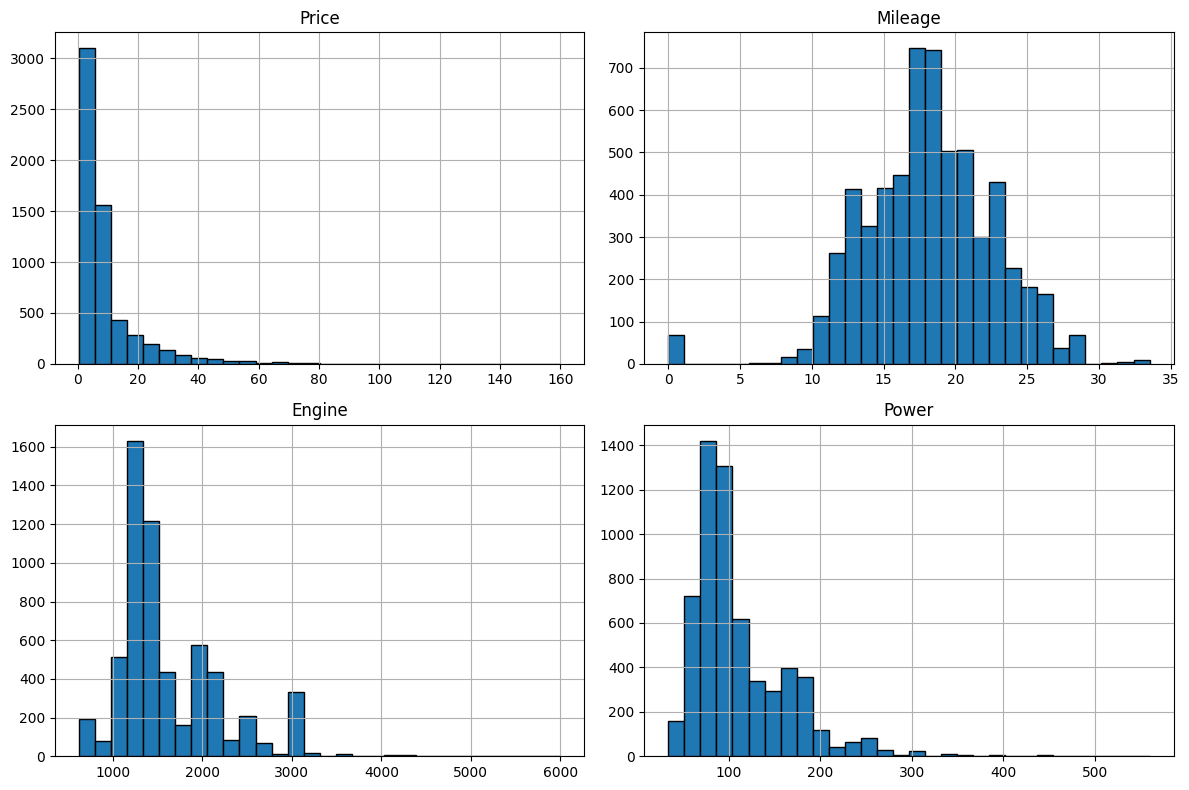

In [18]:
plt.figure(figsize=(12, 8))
df[['Price', 'Mileage', 'Engine', 'Power']].hist(bins=30, figsize=(12, 8), layout=(2, 2), edgecolor='black')
plt.tight_layout()
plt.show()

### 🔥 Matrice de corrélation pour voir les relations entre variables

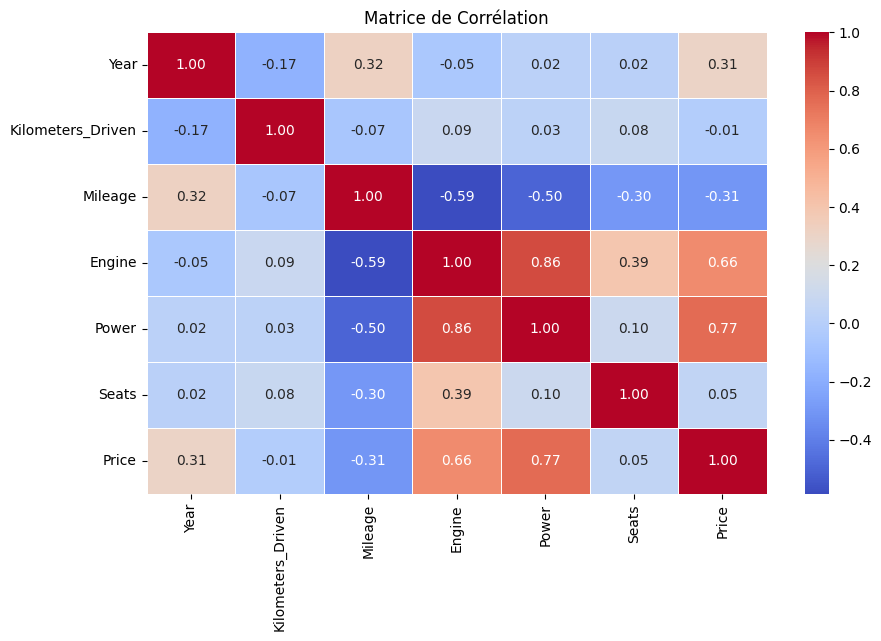

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

### 🕵🏼‍♂️ Détection des valeurs aberrantes

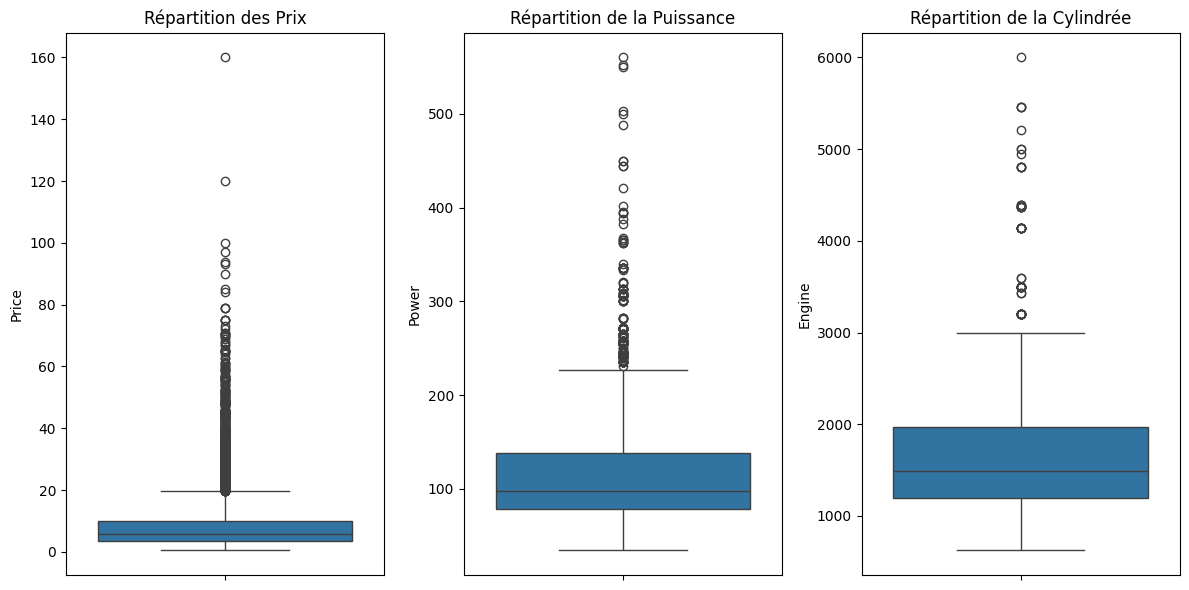

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df["Price"])
plt.title("Répartition des Prix")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["Power"])
plt.title("Répartition de la Puissance")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["Engine"])
plt.title("Répartition de la Cylindrée")

plt.tight_layout()
plt.show()

### 🔎 Analyse des variables catégoriques

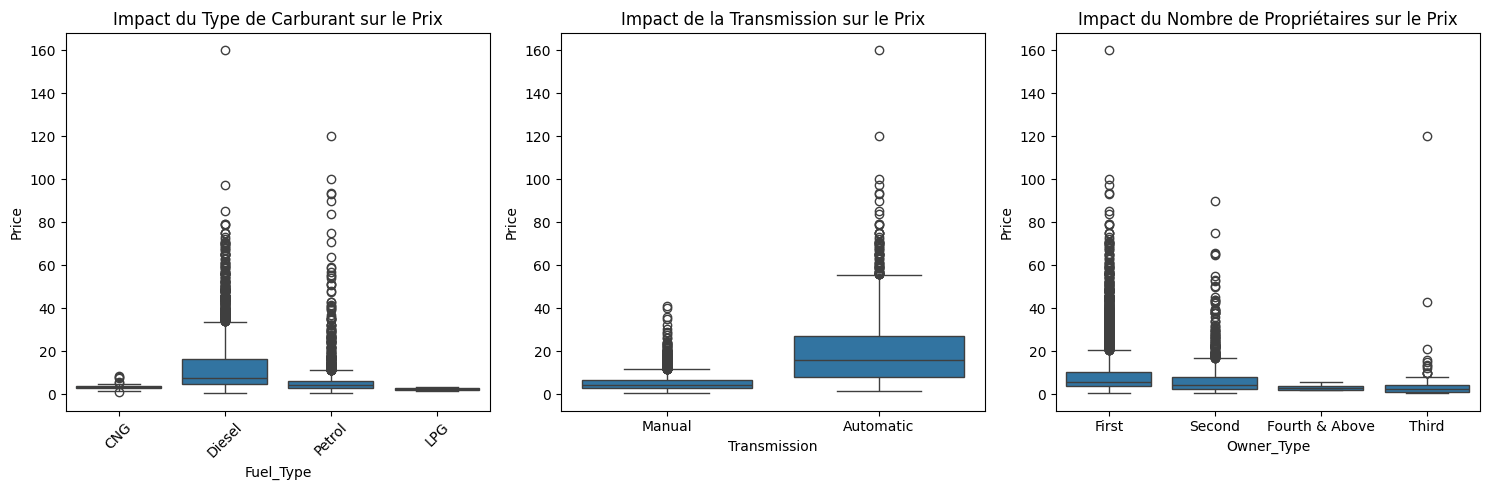

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df["Fuel_Type"], y=df["Price"])
plt.xticks(rotation=45)
plt.title("Impact du Type de Carburant sur le Prix")

plt.subplot(1, 3, 2)
sns.boxplot(x=df["Transmission"], y=df["Price"])
plt.title("Impact de la Transmission sur le Prix")

plt.subplot(1, 3, 3)
sns.boxplot(x=df["Owner_Type"], y=df["Price"])
plt.title("Impact du Nombre de Propriétaires sur le Prix")

plt.tight_layout()
plt.show()

### 📊 Calcul des moyennes et médianes

In [25]:
mk_stats = df[['Price', 'Mileage', 'Engine', 'Power']].describe()
print("Statistiques Descriptives:\n", mk_stats)

Statistiques Descriptives:
              Price      Mileage       Engine        Power
count  6017.000000  6017.000000  6017.000000  6017.000000
mean      9.478340    18.134961  1620.737078   112.902114
std      11.189605     4.582289   599.398319    53.282014
min       0.440000     0.000000   624.000000    34.200000
25%       3.500000    15.170000  1198.000000    78.000000
50%       5.640000    18.150000  1493.000000    97.700000
75%       9.950000    21.100000  1969.000000   138.030000
max     160.000000    33.540000  5998.000000   560.000000


### 📊 Visualisation des moyennes

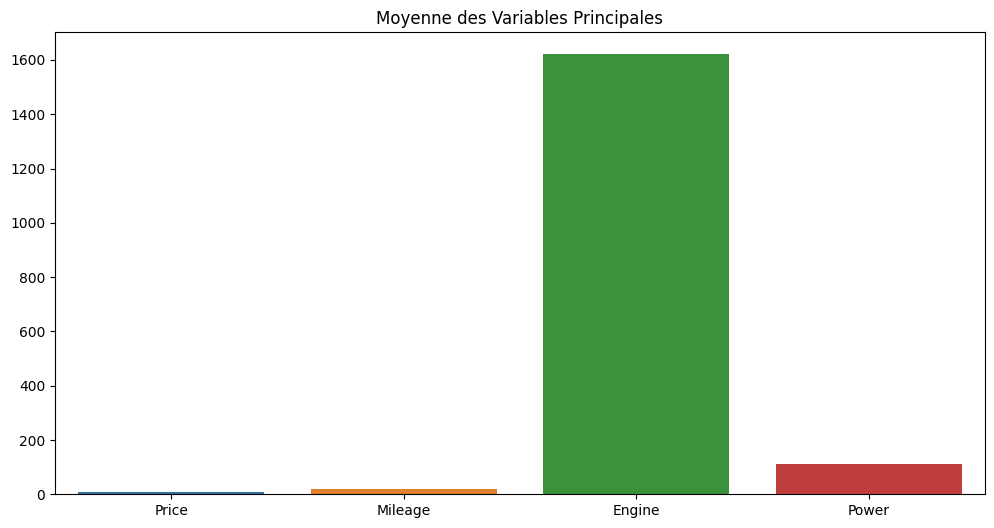

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[['Price', 'Mileage', 'Engine', 'Power']], errorbar=None)
plt.title("Moyenne des Variables Principales")
plt.show()

## 📌 Étapes du Preprocessing

### 1️⃣ Gestion des valeurs manquantes

🔹 Suppression de la colonne New_Price car plus de 80% des valeurs sont manquantes.<br>
🔹 Imputation des valeurs manquantes pour Mileage, Engine, Power, et Seats en remplaçant par la médiane de chaque variable.

### 2️⃣ Traitement des valeurs extrêmes (outliers)

🔹 Transformation logarithmique (np.log1p()) appliquée sur Price, Power, et Engine afin de réduire l’impact des valeurs extrêmes.<br>
🔹 Filtrage des outliers avec la méthode IQR pour identifier et supprimer les valeurs aberrantes.

### 3️⃣ Extraction et transformation des variables catégoriques

🔹 Récupération de la marque du véhicule à partir de la colonne Name en extrayant le premier mot (ex : “Maruti Swift” → “Maruti”).<br>
🔹 Encodage One-Hot appliqué sur les variables Fuel_Type, Transmission, Owner_Type, et Location pour les transformer en variables numériques.<br>
🔹 Encodage ordinal pour Owner_Type avec l’ordre suivant :
➝ First < Second < Third < Fourth & Above

### 4️⃣ Création de nouvelles variables (Feature Engineering)

🔹 Âge du véhicule = 2025 - Year (années depuis la mise en circulation).<br>
🔹 Prix par cheval-vapeur = Price / Power, permettant d’évaluer le rapport prix/performance du moteur.<br>
🔹 Prix par km parcouru = Price / Kilometers_Driven, pour comparer le prix par distance parcourue.

## 🎯 Objectifs finaux du preprocessing

✅ Éliminer les valeurs manquantes pour éviter les biais.<br>
✅ Transformer toutes les variables en format numérique pour les modèles de Machine Learning.<br>
✅ Réduire l’effet des valeurs extrêmes pour améliorer la stabilité des prédictions.<br>
✅ Créer de nouvelles features pertinentes qui amélioreront la précision du modèle.<br>
✅ Extraire la marque du véhicule pour capturer l’effet de la marque sur le prix de revente.